# 1) Выберите ряд из первого задания.

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
from matplotlib.gridspec import GridSpec
from sklearn.metrics import mean_squared_error
from statsmodels.api import qqplot
import warnings

In [ ]:
warnings.filterwarnings('ignore')

**Набор данных временных рядов, отражающий общее число зарегистрированных рождений женщин в Калифорнии, США, в течение 1959 года.**

In [ ]:
data = pd.read_csv("daily-total-female-births-in-cal.csv")

In [ ]:
data.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
series = data['Count']

In [ ]:
def Dickey_Fuller(y):
  """"Функция принимает на вход временной ряд
  и выводит на печать значения теста Дики-Фуллера 
  """
  result = adfuller(y)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    print()
  if result[1] > 0.05:
    print('Временной ряд не является стационарным')
  else:
    print('Стационарный временной ряд') 

In [ ]:
def grafs(series):
    """Функция для отображения графиков Time series, ACF, PACF """
    fig = plt.figure(figsize=(12, 8), dpi = 120)
    gs = GridSpec(3, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(series, color='blue')
    ax1.set_title('Time series')
    ax1.set_facecolor('lightgray')
    ax1.grid(True)

    ax2 = fig.add_subplot(gs[1, 0])
    plot_acf(series, color='green',ax=ax2)
    ax2.set_title('Autocorrelation Function (ACF)')
    ax2.set_facecolor('lightyellow')
    ax2.grid(True)

    ax3 = fig.add_subplot(gs[1, 1])
    plot_pacf(series, color='red', ax=ax3)
    ax3.set_title('Partial Autocorrelation Function (PACF)')
    ax3.set_facecolor('lightblue')
    ax3.grid(True)

    ax4 = fig.add_subplot(gs[2, :])
    qqplot(series,line = 's', ax = ax4)
    ax4.set_title('QQ Plot')
    ax4.set_facecolor('lightgray')
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

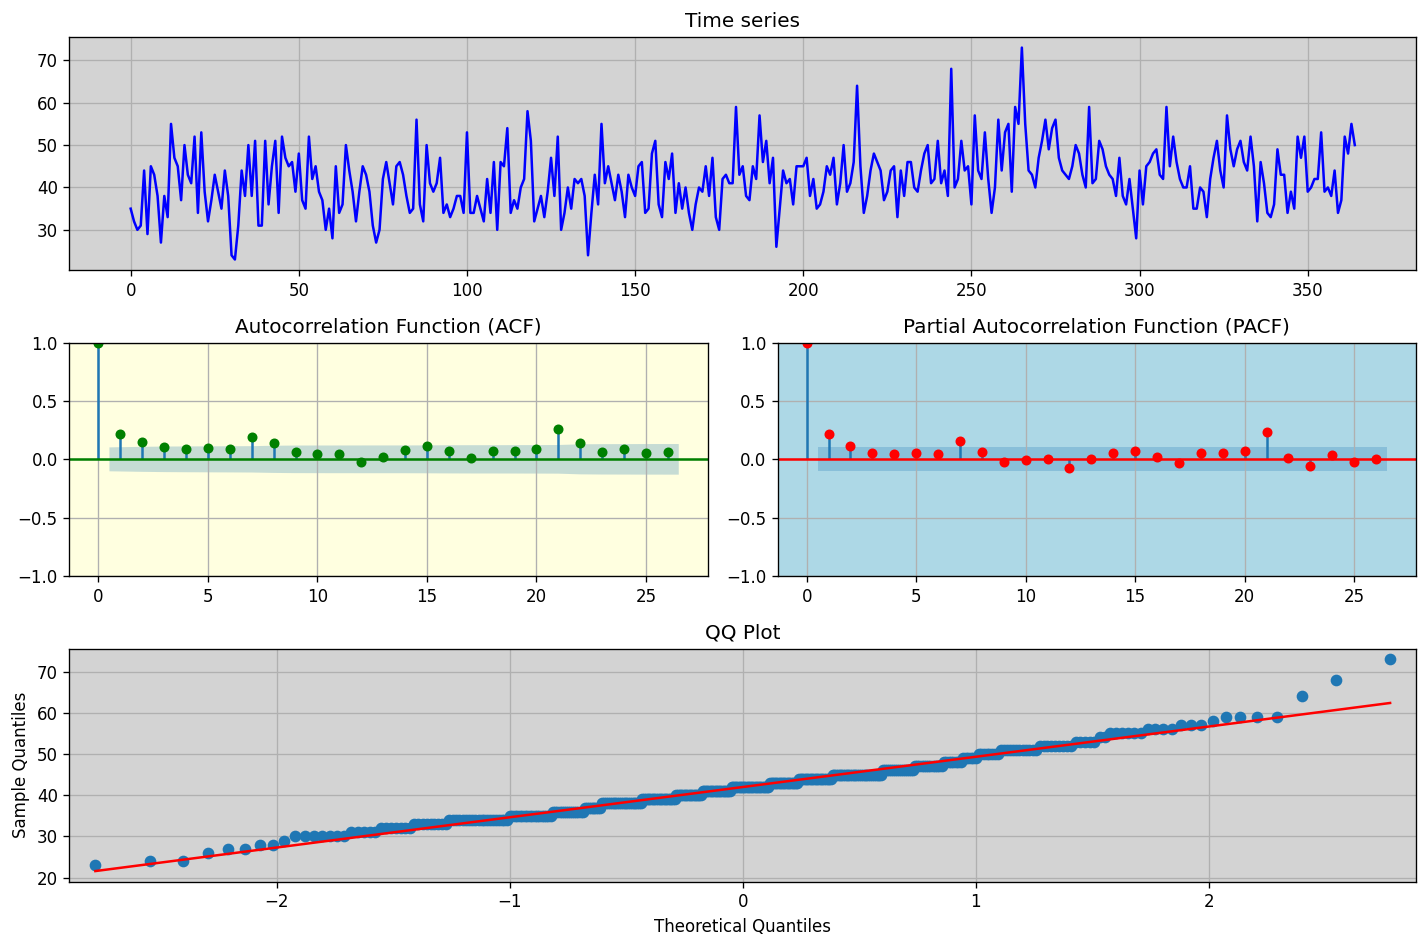

In [ ]:
grafs(series)

In [ ]:
Dickey_Fuller(series)

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449

	5%: -2.870

	10%: -2.571

Стационарный временной ряд


#2)Постройте его модель GARCH.

Модель GARCH (Generalized Autoregressive Conditional Heteroskedasticity) является статистической моделью, используемой для анализа и прогнозирования временных рядов с изменяющейся волатильностью (условной гетероскедастичностью). Она была разработана для учета особенностей финансовых данных, которые часто характеризуются нестабильной волатильностью.

Модель GARCH предполагает, что дисперсия (волатильность) временного ряда зависит от предыдущих значений самого ряда и квадратов его ошибок. Она состоит из двух компонент: авторегрессионной компоненты (ARCH) и скользящей средней компоненты (GARCH).

Авторегрессионная компонента (ARCH) модели GARCH объясняет зависимость дисперсии от предыдущих квадратов ошибок временного ряда. Это позволяет учесть эффект аутокорреляции волатильности.

Скользящая средняя компонента (GARCH) модели GARCH объясняет зависимость дисперсии от предыдущих значений волатильности. Она учитывает эффект скользящего среднего волатильности и позволяет моделировать плавающую волатильность во временном ряду.

Основная идея модели GARCH заключается в том, что предыдущие значения волатильности и квадраты ошибок содержат информацию о будущей волатильности, которая может быть использована для прогнозирования.

$\sigma_t^2 = V(u_t | u_{t-1}, ..., u_{t-q}) = \alpha_0 + \sum_{i=1}^q \alpha_i u_{t-i}^2 + \sum_{j=1}^p \beta_j \sigma_{t-j}^2$

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 12.5 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
train , test = series[:-10], series[-10:] # разделяем временной ряд на train и test, будем прогнозировать 10 значений

In [ ]:
model = arch_model(train, vol='Garch', p= 1, o= 1, q= 1, dist='StudentsT')

In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1225.8353398814907
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1277.706092491846
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1210.346884976661
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1209.432799540933
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1209.0344842868906
Iteration:      6,   Func. Count:     50,   Neg. LLF: 1209.2641077127632
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1209.0197547916796
Iteration:      8,   Func. Count:     65,   Neg. LLF: 1209.0101753551426
Iteration:      9,   Func. Count:     72,   Neg. LLF: 1208.9755471181866
Iteration:     10,   Func. Count:     79,   Neg. LLF: 1208.9352125368182
Iteration:     11,   Func. Count:     86,   Neg. LLF: 1208.9133349378023
Iteration:     12,   Func. Count:     93,   Neg. LLF: 1208.8803362469625
Iteration:     13,   Func. Count:    100,   Neg. LLF: 1208.7046272173861
Iteration:     14,   Func. Count:    107,   Neg. LLF: 

In [ ]:
forecast = model_fit.forecast(horizon= 10) # делаем прогноз

In [ ]:
preds = forecast.variance.values[-1, :]

In [ ]:
pred_series = train.append(pd.Series(preds), ignore_index=True)

In [ ]:
confidence_interval = np.std(pred_series)*1.96

In [ ]:
def plot_pred_test(series,series_pred, last_index_train = 93):
    """Функция для отображения предсказанных значений в сравнении с реальными """
    confidence_interval = np.std(series_pred)*1.96
    plt.figure(figsize=(12, 6), dpi = 120)
    plt.plot(series_pred, color='green', linewidth='3', label='Pred')
    plt.plot(series, color='blue', linewidth='3', label='Real', alpha = 0.5)
    plt.axvline(x= last_index_train-1, color='red', linestyle='--', label='Разделение на реальные и предсказанные значения')
    plt.fill_between(range(len(series_pred)), series_pred - confidence_interval, 
                     series_pred + confidence_interval, color='gray', alpha=0.3, label='95% доверительный интервал')
    plt.grid()
    plt.legend()
    plt.show()

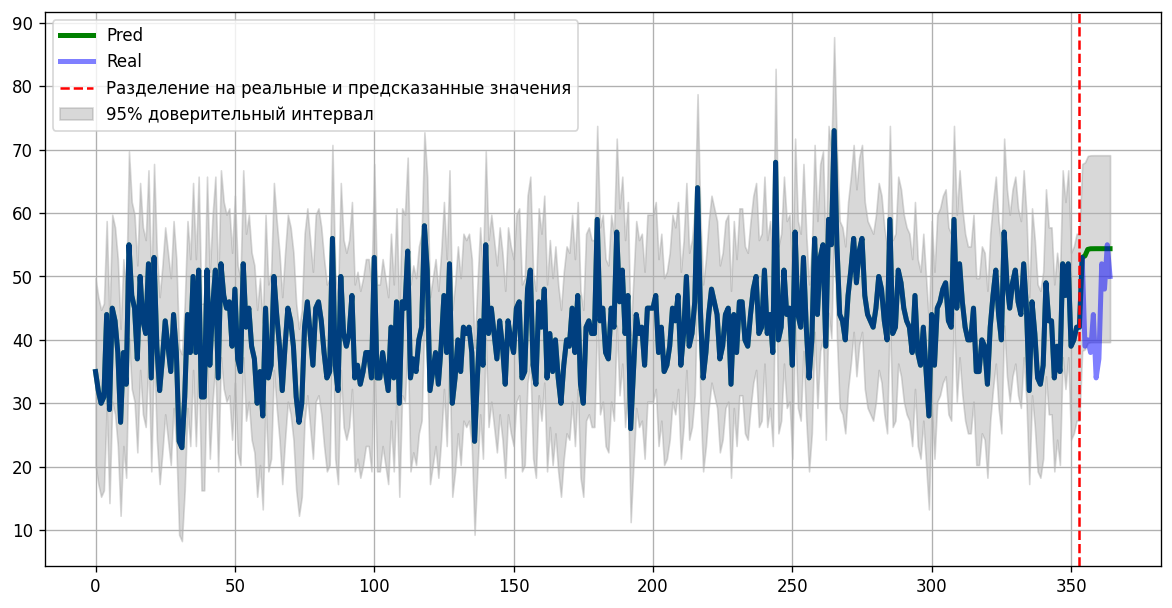

In [ ]:
plot_pred_test(series,pred_series, 354)

In [ ]:
mean_squared_error(test,preds, squared= False)# Считаем ошибку RMSE

12.511532263802312

Попробуем улучшить результаты модели. Найдем лучшие параметры для модели ARIMA, так как лучшие параметры для модели ARIMA являются лучшими и для модели GARCH.

**Модель ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
from tqdm import tqdm

In [ ]:
def get_best_params(series):
  """Функция проходит по различным значениям p, d и q и подберает те, 
  при которых AIC будет минимальным."""
  p = range(0,10)
  d = range(0,10)
  q = range(0,10)
  pdq = list(itertools.product(p, d, q))
  best_pdq = (0,0,0)
  best_aic = np.inf
  for params in tqdm(pdq):
    try:
      model_test = ARIMA(series, order = params)
      result_test = model_test.fit()
      if result_test.aic < best_aic:
        best_pdq = params
        best_aic = result_test.aic
    except: 
      pass    
  return best_pdq

In [ ]:
best_params = get_best_params(train)

100%|██████████| 1000/1000 [44:14<00:00,  2.65s/it]


In [ ]:
print(best_params)

(2, 7, 4)


**Построение модели GARCH с оптимальными параметрами**

In [ ]:
model_garch = arch_model(train, vol='Garch', p= 2, o= 7, q= 4, dist='StudentsT')

In [ ]:
model_garch_fit = model_garch.fit()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 1288.3943538590897
Iteration:      2,   Func. Count:     37,   Neg. LLF: 1273.0608267675816
Iteration:      3,   Func. Count:     56,   Neg. LLF: 1311.9805557899267
Iteration:      4,   Func. Count:     75,   Neg. LLF: 1212.3250464380503
Iteration:      5,   Func. Count:     93,   Neg. LLF: 1208.1022956591605
Iteration:      6,   Func. Count:    110,   Neg. LLF: 1208.1876060702825
Iteration:      7,   Func. Count:    128,   Neg. LLF: 1208.0886277401542
Iteration:      8,   Func. Count:    146,   Neg. LLF: 1211.8881764005662
Iteration:      9,   Func. Count:    164,   Neg. LLF: 1207.6225736248975
Iteration:     10,   Func. Count:    181,   Neg. LLF: 1207.6229829301158
Iteration:     11,   Func. Count:    199,   Neg. LLF: 1207.6161008973609
Iteration:     12,   Func. Count:    216,   Neg. LLF: 1207.61334889829
Iteration:     13,   Func. Count:    233,   Neg. LLF: 1207.6023036858392
Iteration:     14,   Func. Count:    250,   Neg. LLF:

In [ ]:
forecast2 = model_garch_fit.forecast(horizon= 10) # делаем прогноз

In [ ]:
preds2 = forecast2.variance.values[-1, :]

In [ ]:
pred_series2 = train.append(pd.Series(preds2), ignore_index=True)

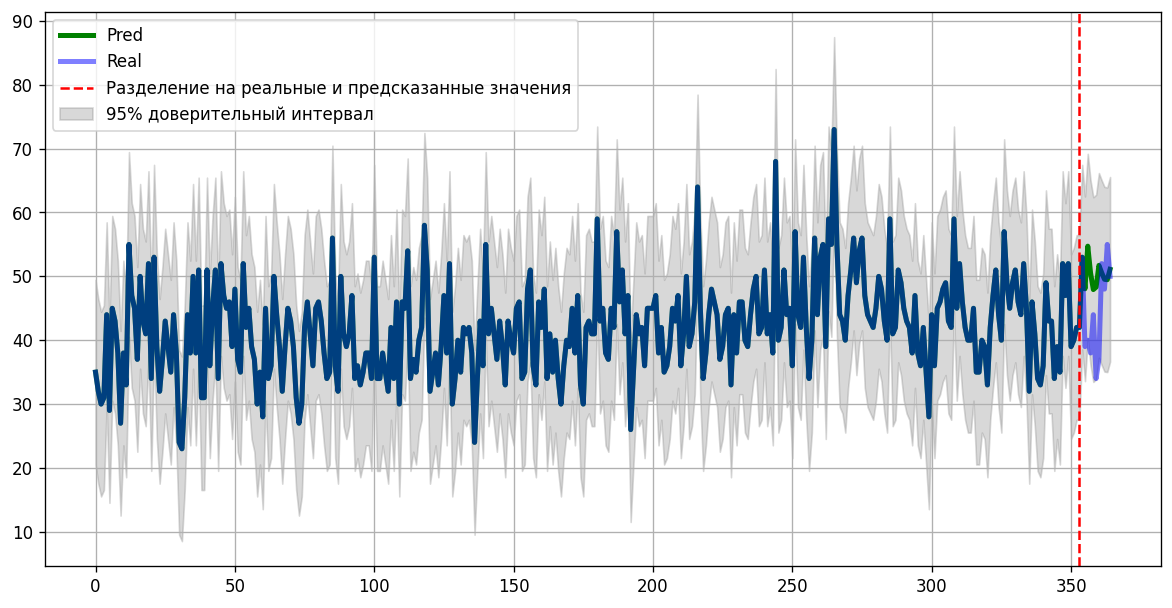

In [ ]:
plot_pred_test(series,pred_series2, 354)

In [ ]:
RMSE_GARCH = mean_squared_error(test,preds2, squared= False)# Считаем ошибку RMSE

In [ ]:
RMSE_GARCH

9.63967765015812

Как видим нам удалось улучшить результаты работы модели

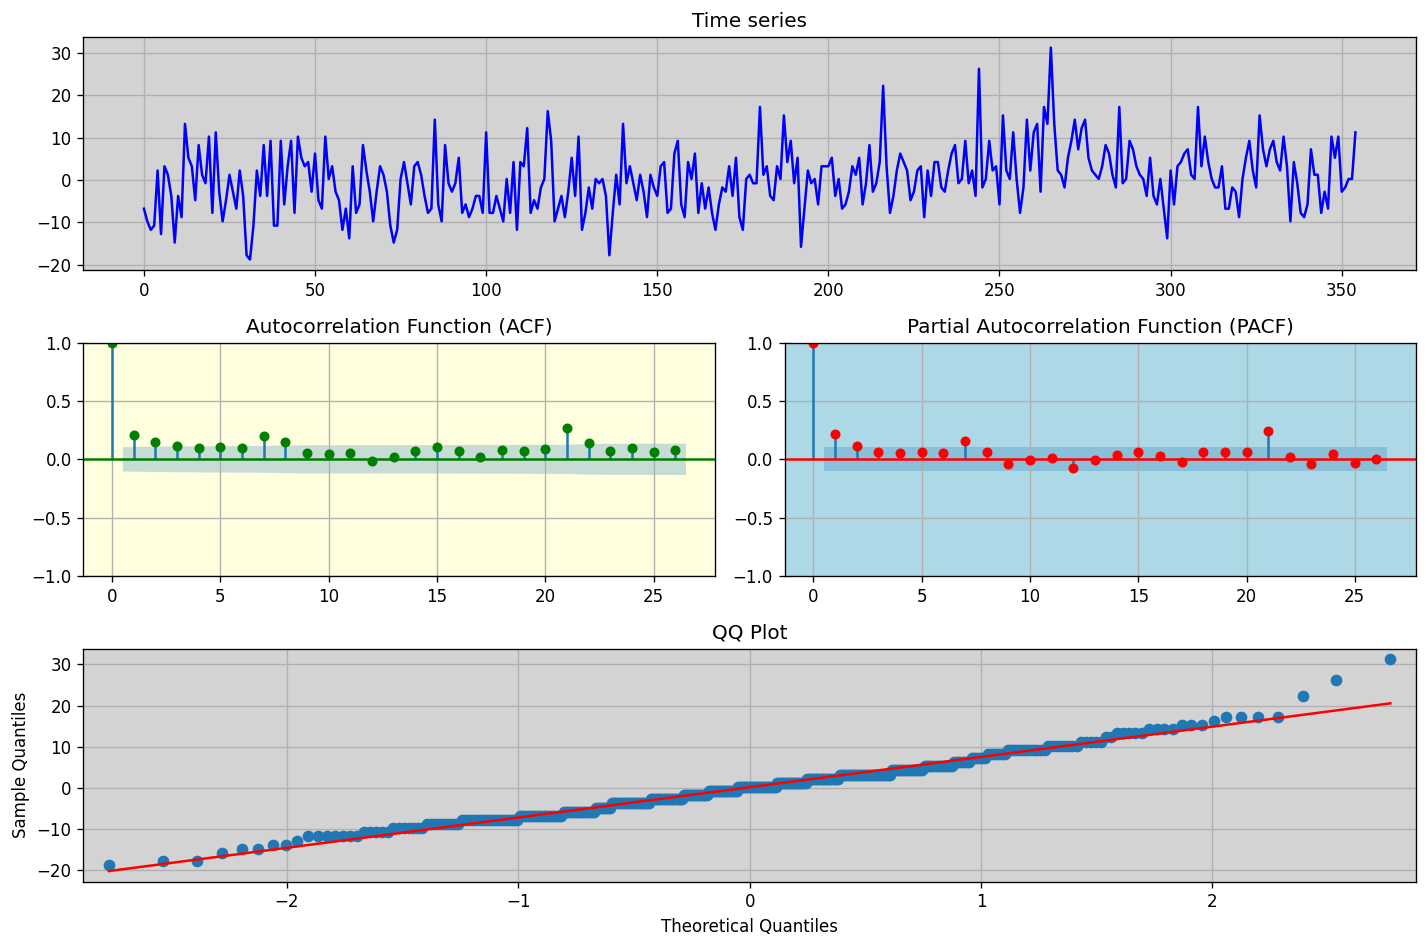

In [ ]:
grafs(model_garch_fit.resid) # смотрим график остатков

In [ ]:
Dickey_Fuller(model_garch_fit.resid)

ADF Statistic: -4.726484
p-value: 0.000075
Critical Values:
	1%: -3.449

	5%: -2.870

	10%: -2.571

Стационарный временной ряд


График остатков временного ряда стационарен. По графику остатков(кареллограмм) видно что есть небольшая избыточная корреляция, возможно это остаточный шум или нужно применить другую модель к временному ряду.

#*Прогнозирование значений временного ряда с помощью классического ML

Добавим день недели и выходной в качестве категориальных переменных, и добавляем лаги исходного ряда в качестве признаков

In [ ]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):
    
    data = pd.DataFrame(data.copy())
    
    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))
    
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.Count.shift(i)

    # Добавляем признаки месяца, дня недели , выходного дня
    data['Date'] = pd.to_datetime(data['Date'])
    data["month"] =data['Date'].dt.month
    data["weekday"] = data['Date'].dt.weekday
    data['is_weekend'] = data["weekday"].isin([5,6])*1 
    data.drop('Date', axis = 1)

    data = data.dropna()
    data = data.reset_index(drop=True)
    data = data.drop('Date', axis = 1) 

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["Count"], axis=1)
    y_train = data.loc[:test_index]["Count"]
    X_test = data.loc[test_index:].drop(["Count"], axis=1)
    y_test = data.loc[test_index:]["Count"]
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = prepareData(data, lag_start=1, lag_end=20, test_size=0.078)

In [ ]:
len(y_test) # для теста возмем так-же 10 значений ряда, как и для модели GARCH

10

## Линейная регрессия

Линейная регрессия - это простая и широко используемая модель для моделирования и предсказания зависимости между непрерывными переменными. Она основана на предположении, что существует линейная связь между зависимой переменной и одной или несколькими независимыми переменными.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
prediction = lr.predict(X_test)

In [ ]:
RMSE_LR = mean_squared_error(y_test,prediction, squared= False) # Считаем ошибку RMSE

In [ ]:
RMSE_LR

6.2885515998869375

In [ ]:
pred_lr = y_train.append(pd.Series(prediction), ignore_index=True)

In [ ]:
series_ = y_train.append(pd.Series(y_test), ignore_index=True)

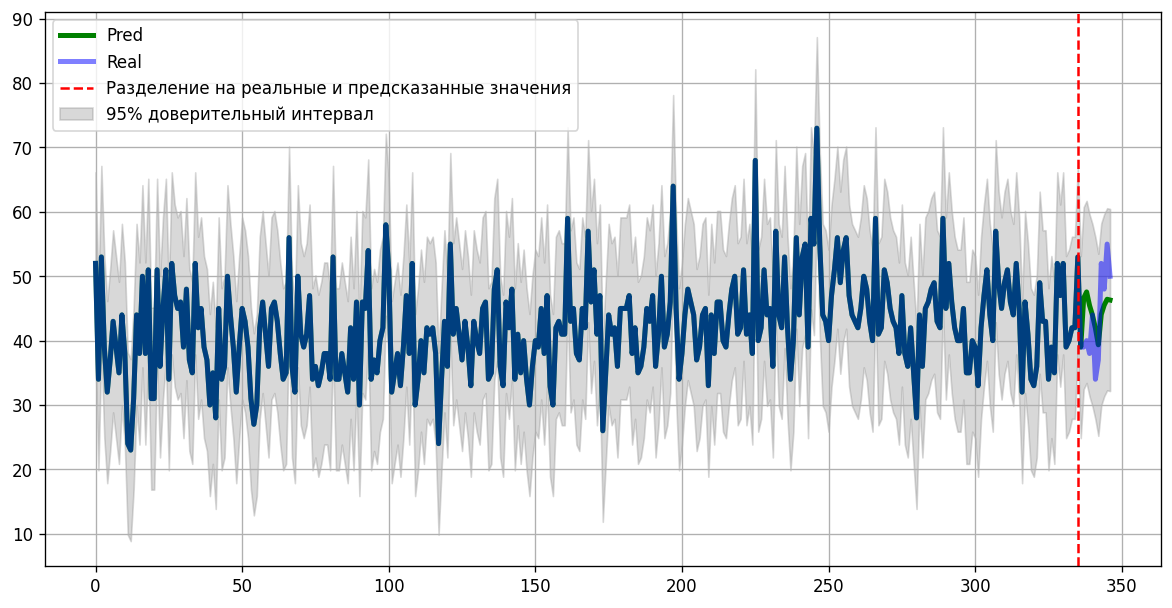

In [ ]:
plot_pred_test(series_,pred_lr, 336)

По rmse и графику видно, что модель линейной регрессии с прогнозированием временного ряда справилась лучше 

##XGBoost

XGBoost (eXtreme Gradient Boosting) - это мощная и эффективная библиотека для градиентного бустинга, которая широко используется для задач машинного обучения, включая прогнозирование и классификацию. Она предоставляет реализацию алгоритма градиентного бустинга на деревьях решений.

Основная идея XGBoost заключается в том, чтобы последовательно обучать наборы простых моделей, которые называются базовыми моделями (base models) или слабыми моделями (weak models), и комбинировать их для получения более сильной и точной модели. Градиентный бустинг работает в режиме ансамбля, где каждая новая модель обучается на остатках предыдущих моделей, чтобы улучшить прогноз.

XGBoost обладает высокой эффективностью, быстродействием и хорошей обобщающей способностью, и он широко применяется во многих областях, включая прогнозирование временных рядов, классификацию и ранжирование.

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor(random_state = 1)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [ ]:
predict_XGB = model_xgb.predict(X_test)

In [ ]:
mean_squared_error(y_test, predict_XGB, squared= False)

7.221626174639649

**Оптимизируем гиперпараметры**

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    params = {
        'eta': trial.suggest_categorical('eta', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 50),
        'gamma': trial.suggest_categorical('gamma', [18, 19, 20, 21, 22, 23, 24, 25]),
        'random_state': 1
    }

    model = xgb.XGBRegressor(**params)  
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return mean_squared_error(y_test, predictions)

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2023-06-04 16:05:55,844] A new study created in memory with name: no-name-7bb2e4ba-d63e-4d83-825e-cab95ec8b8ee
[I 2023-06-04 16:06:02,830] Trial 0 finished with value: 38.13187761183944 and parameters: {'eta': 0.3, 'n_estimators': 678, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 23}. Best is trial 0 with value: 38.13187761183944.
[I 2023-06-04 16:06:03,983] Trial 1 finished with value: 41.12230830870976 and parameters: {'eta': 0.6, 'n_estimators': 321, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 23}. Best is trial 0 with value: 38.13187761183944.
[I 2023-06-04 16:06:16,851] Trial 2 finished with value: 40.971307056592195 and parameters: {'eta': 0.9, 'n_estimators': 995, 'max_depth': 3, 'min_child_weight': 13, 'gamma': 20}. Best is trial 0 with value: 38.13187761183944.
[I 2023-06-04 16:06:21,130] Trial 3 finished with value: 36.10841922081018 and parameters: {'eta': 0.5, 'n_estimators': 262, 'max_depth': 7, 'min_child_weight': 38, 'gamma': 24}. Best is trial 3 with value: 3

In [ ]:
print(f'Best value: {study.best_trial.value}')
print(f'Best params: {study.best_trial.params}')

Best value: 9.735907832576776
Best params: {'eta': 1.0, 'n_estimators': 775, 'max_depth': 7, 'min_child_weight': 34, 'gamma': 21}


In [ ]:
model_xgb_opt = xgb.XGBRegressor(random_state = 1, eta = 1.0, n_estimators= 775, max_depth= 7, min_child_weight= 34, gamma= 21)

In [ ]:
model_xgb_opt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=1.0, eval_metric=None,
             feature_types=None, gamma=21, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=34, missing=nan,
             monotone_constraints=None, n_estimators=775, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
predict_XGB_opt = model_xgb_opt.predict(X_test)

In [ ]:
RMSE_XGBoost = mean_squared_error(y_test, predict_XGB_opt, squared= False)

In [ ]:
RMSE_XGBoost

3.120241630479405

In [ ]:
pred_XGB = y_train.append(pd.Series(predict_XGB_opt), ignore_index=True)

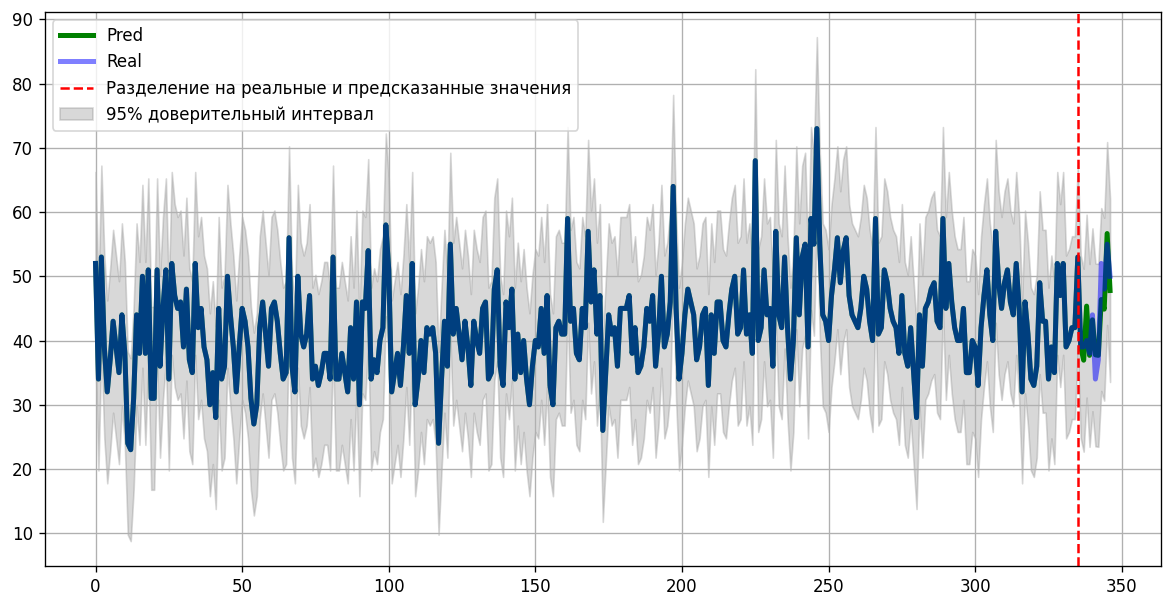

In [ ]:
plot_pred_test(series_,pred_XGB, 336)

Модель XGBoost справилась с задачей прогнозирования временного ряда еще лучше.

#**Прогнозирование значений временного ряда с помощью нейросети LSTM

 LSTM (Long Short-Term Memory) - это специальный тип рекуррентной нейронной сети, который позволяет обрабатывать и моделировать зависимости во временных рядах. LSTM был разработан для решения проблемы затухания/взрывающихся градиентов, с которыми сталкиваются простые рекуррентные нейронные сети при обработке долгосрочных зависимостей.

Основной идеей LSTM является использование специальных блоков памяти, которые позволяют сети запоминать информацию в течение длительного временного периода. Они состоят из нескольких компонентов:

* Клеточное состояние (cell state): Это основная "память" LSTM. Он передает информацию через время, пропуская или добавляя информацию с использованием вентилей.
* Вентили (gates): LSTM использует три вентиля - вентиль забывания (forget gate), входной вентиль (input gate) и выходной вентиль (output gate) - чтобы контролировать поток информации внутри сети.
* Вентиль забывания (forget gate) решает, какую информацию следует забыть из предыдущего состояния.
* Входной вентиль (input gate) решает, какую информацию следует обновить в текущем состоянии на основе нового входа.
*Выходной вентиль (output gate) решает, какую информацию следует использовать для вывода из текущего состояния.
* Внутренние ячейки (cell units): LSTM использует эти ячейки для хранения и обновления информации с течением времени.

При использовании LSTM для прогнозирования временных рядов, входные данные представляются в виде последовательности временных шагов, а LSTM модель обучается на основе этой последовательности. Входной слой LSTM принимает последовательность данных, а скрытый слой LSTM обрабатывает эту последовательность, передавая информацию через время. Затем, после скрытого слоя, может быть добавлен один или несколько полносвязных слоев (Dense layers) для получения прогноза.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
values = series.values.reshape(-1, 1)

In [ ]:
scaled_values = scaler.fit_transform(values)# Масштабирование данных

In [ ]:
train_data = scaled_values[:-16]
test_data = scaled_values[-16:]

In [ ]:
# Создание обучающих и тестовых наборов данных
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 5  # Количество предыдущих временных шагов, используемых для прогнозирования следующего шага
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

Преобразование данных в трехмерный формат [образцы, временные шаги, признаки]

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Задание параметров модели
sequence_length = 5  # Длина последовательности данных
hidden_units = 128  # Количество нейронов в скрытом слое LSTM
epochs = 100  # Количество эпох обучения модели

In [ ]:
model = Sequential()
model.add(LSTM(hidden_units, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Обучение модели
model.fit(X_train, y_train, epochs=epochs, batch_size=32)

Epoch 1/100
11/11 [==============================] - 3s 17ms/step - loss: 0.0760
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0277
Epoch 3/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0220
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0214
Epoch 5/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0212
Epoch 6/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0210
Epoch 7/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0211
Epoch 8/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0207
Epoch 9/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0208
Epoch 10/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0208
Epoch 11/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0207
Epoch 12/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0206
Epoch 13/100
11/11 [=====

In [ ]:
predicted_values = model.predict(X_test)

1/1 [==============================] - 0s 454ms/step


In [ ]:
predicted_values = scaler.inverse_transform(predicted_values)

In [ ]:
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
RMSE_LSTM = mean_squared_error(y_test, predicted_values, squared= False) # Считаем RMSE

In [ ]:
RMSE_LSTM

7.274820807205364

#Заключение

In [ ]:
scores_model = pd.DataFrame({'Модель':['GARCH','LinearRegression','XGBoost','LSTM'],
                             'RMSE':[RMSE_GARCH, RMSE_LR, RMSE_XGBoost, RMSE_LSTM]})

In [ ]:
scores_model.sort_values('RMSE')

,Модель,RMSE
2,XGBoost,3.120242
1,LinearRegression,6.288552
3,LSTM,7.274821
0,GARCH,9.639678


**При прогнозировании временных рядов ,в данном случае, лучшая метрика у модели XGBoost**